# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel(r'F:/Data_Train.xlsx')
test_df = pd.read_excel(r'F:/Test_Set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
big_df  = train_df.append(test_df,sort=False)

In [6]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [9]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]

In [10]:
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [11]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
big_df = big_df.drop(['Date_of_Journey'],axis=1)

In [13]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [14]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [15]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [16]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [18]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [19]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')

In [20]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [21]:
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]

In [22]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [23]:
big_df['Total_Stops'] = big_df['Total_Stops'].astype('int')

In [24]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [25]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[1]

In [26]:
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype('int')
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype('int')

In [27]:
big_df = big_df.drop(['Arrival_Time'],axis=1)

In [28]:
big_df['Departure_Hour'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'].str.split(':').str[1]

In [29]:
big_df['Departure_Hour'] = big_df['Departure_Hour'].astype('int')
big_df['Departure_Minute'] = big_df['Departure_Minute'].astype('int')

In [30]:
big_df = big_df.drop(['Dep_Time'],axis=1)

In [31]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [32]:
big_df['Duration_Hour'] = big_df['Duration'].str.split(' ').str[0]
big_df['Duration_Minute'] = big_df['Duration'].str.split(' ').str[1]


In [33]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4h,45m


In [34]:
big_df['Duration_Hour']= big_df['Duration_Hour'].str.split('h').str[0]
big_df['Duration_Minute'] = big_df['Duration_Minute'].str.split('m').str[0]


In [35]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [36]:
big_df['Duration_Minute'] = big_df['Duration_Minute'].fillna(0)

In [37]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].fillna(0)

In [38]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [39]:
big_df['Route_1'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'].str.split('→ ').str[4]

In [40]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,9,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,30,18,5,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN


In [41]:
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)
big_df['Route_5'].fillna('None',inplace=True)

In [42]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,35,16,50,4,45,BLR,NAG,DEL,None,None


In [43]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Duration_Hour          0
Duration_Minute        0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

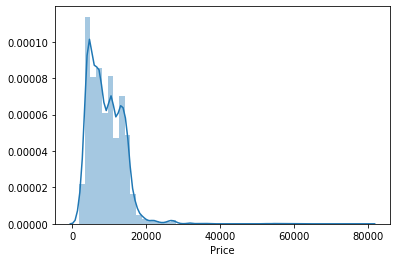

In [44]:
sns.distplot(big_df['Price'])

In [45]:
train_df.mean()

Price    9087.064121
dtype: float64

In [46]:
big_df['Price'].mean(),big_df['Price'].max(),big_df['Price'].median(),big_df['Price'].mode()

(9087.064120565385,
 79512.0,
 8372.0,
 0    10262.0
 dtype: float64)

In [47]:
big_df['Price'].fillna(big_df['Price'].median(),inplace=True)

In [48]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Duration_Hour       0
Duration_Minute     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder = LabelEncoder()
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Route_1'] = encoder.fit_transform(big_df['Route_1'])
big_df['Route_2'] = encoder.fit_transform(big_df['Route_2'])
big_df['Route_3'] = encoder.fit_transform(big_df['Route_3'])
big_df['Route_4'] = encoder.fit_transform(big_df['Route_4'])
big_df['Route_5'] = encoder.fit_transform(big_df['Route_5'])


In [51]:
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])

In [52]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,BLR → DEL,2h 50m,0,8,3897.0,24,3,...,10,22,20,2,50,0,13,24,12,4
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2,8,7662.0,1,5,...,15,5,50,7,25,2,25,1,3,4
2,4,2,1,DEL → LKO → BOM → COK,19h,2,8,13882.0,9,6,...,25,9,25,19,0,3,32,4,5,4
3,3,3,0,CCU → NAG → BLR,5h 25m,1,8,6218.0,12,5,...,30,18,5,5,25,2,34,3,12,4
4,3,0,5,BLR → NAG → DEL,4h 45m,1,8,13302.0,1,3,...,35,16,50,4,45,0,34,8,12,4


In [53]:
big_df.drop(['Route'],axis=1,inplace=True)

In [54]:
big_df.drop(['Duration'],axis=1,inplace=True)

In [55]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45,0,34,8,12,4


In [56]:
big_df['Duration_Minute'] = big_df['Duration_Minute'].astype(int)

In [57]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].str.split('m').str[0]

In [58]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].astype(int)

In [59]:
big_df.dtypes

Airline               int32
Source                int32
Destination           int32
Total_Stops           int32
Additional_Info       int32
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Duration_Hour         int32
Duration_Minute       int32
Route_1               int32
Route_2               int32
Route_3               int32
Route_4               int32
Route_5               int32
dtype: object

## Feature Selection

In [60]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

In [61]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [62]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [64]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [65]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [66]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [67]:
selected_features = X_train.columns[(model.get_support())]

In [68]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Duration_Hour', 'Duration_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [69]:
X_train = X_train.drop(['Year'],axis=1)

In [70]:
X_test = X_test.drop(['Year'],axis=1)

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
le_reg = LinearRegression()

In [73]:
le_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
le_reg.intercept_

7939.431750258055

In [76]:
le_reg.coef_

array([ 1.53713774e+02, -1.58480537e+02,  3.55984148e+02,  3.37962691e+03,
        1.79388302e+02, -7.60728814e+01, -3.58857685e+02, -1.38783339e+01,
       -2.47570244e+00,  2.38977464e+01, -3.73023288e+00,  3.18074393e+01,
       -1.01533097e+01, -4.09364101e+02, -9.76456061e+01, -1.45502937e+02,
        3.62619958e+01,  5.61317907e+02])

In [77]:
print('The coefficient of determination R^2 for train set is: {}'.format(le_reg.score(X_train,y_train)))

The coefficient of determination R^2 for train set is: 0.4942171490050114


In [78]:
print('The coefficient of determination R^2 for test set is: {}'.format(le_reg.score(X_test,y_test)))

The coefficient of determination R^2 for test set is: 0.5079142913692207


In [81]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(le_reg,X,y,cv=5)

In [83]:
score.mean()

0.4957982649375413

In [84]:
y_pred = le_reg.predict(X_test)

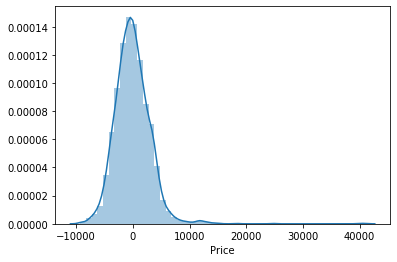

In [85]:
sns.distplot(y_test-y_pred)

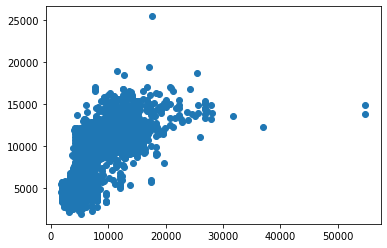

In [87]:
plt.scatter(y_test,y_pred)

In [90]:
from sklearn import metrics

In [93]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE:  2301.425673217353
MSE:  9967909.82008375
RMSE:  47.97317660127744


## Ridge Regression

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ri_reg =Ridge()

In [107]:
parameters = {'alpha':[0.4,0.6,0.004,0.003,0.0004,0.07,3,0.005]}
ri_model = GridSearchCV(estimator=ri_reg,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [108]:
ri_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.4, 0.6, 0.004, 0.003, 0.0004, 0.07, 3,
                                   0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [109]:
print(ri_model.best_params_)
print(ri_model.best_score_)

{'alpha': 3}
-11029404.796955261


In [116]:
print('MSE for train set is: {}'.format(ri_model.score(X_train,y_train)))
print('MSE for train set is: {}'.format(ri_model.score(X_test,y_test)))

MSE for train set is: -10972345.18389689
MSE for train set is: -9967976.773604248


In [110]:
rid_pred = ri_model.predict(X_test)

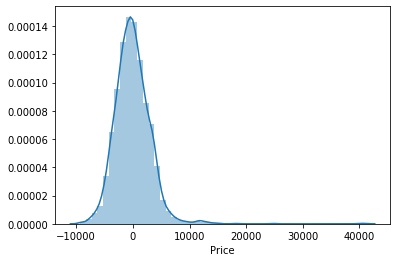

In [111]:
sns.distplot(y_test-rid_pred)

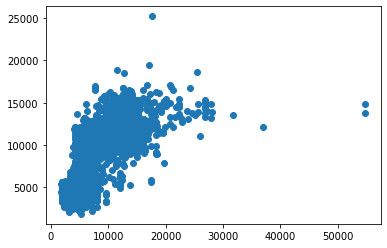

In [114]:
plt.scatter(y_test,rid_pred)

In [115]:
print('MAE: ', metrics.mean_absolute_error(y_test,rid_pred))
print('MSE: ', metrics.mean_squared_error(y_test,rid_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,rid_pred)))

MAE:  2301.2842068483683
MSE:  9967976.773604248
RMSE:  47.97170214666526


## Lasso Regression

In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
la_reg = Lasso()

In [118]:
para =  {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [120]:
las_model = RandomizedSearchCV(la_reg,para,cv=5,scoring='neg_mean_squared_error')

In [121]:
las_model.fit(X_train,y_train)

C:\Users\rk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31331155337.578335, tolerance: 12632186.131948445
  positive)
C:\Users\rk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32189133457.18847, tolerance: 12824777.786637666
  positive)
C:\Users\rk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34478257442.90088, tolerance: 13421549.307022352
  positive)
C:\Users\rk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3286

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [123]:
las_model.best_params_ , las_model.best_score_

({'alpha': 5}, -11028656.421241868)

In [126]:
las_pred = las_model.predict(X_test)

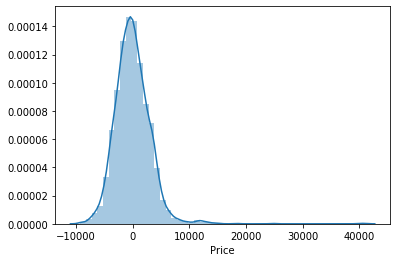

In [127]:
sns.distplot(y_test-las_pred)

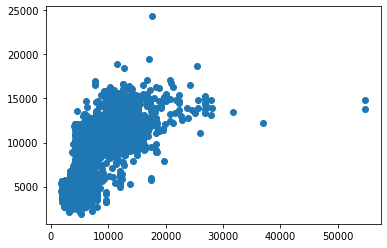

In [129]:
plt.scatter(y_test,las_pred)

In [130]:
print('MAE: ', metrics.mean_absolute_error(y_test,las_pred))
print('MSE: ', metrics.mean_squared_error(y_test,las_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,las_pred)))

MAE:  2299.6809118023066
MSE:  9964707.997635374
RMSE:  47.954988393308014


## Decision Tree Regressor

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
dt_reg = DecisionTreeRegressor()

In [139]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [140]:
dt_reg.score(X_train,y_train),dt_reg.score(X_test,y_test)

(0.9960254535763626, 0.7710278661076329)

In [141]:
score = cross_val_score(dt_reg,X_train,y_train,cv=5)

In [142]:
score.mean()

0.7869425578822956

In [143]:
dt_pred = dt_reg.predict(X_test)

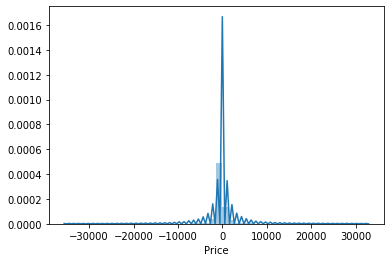

In [144]:
sns.distplot(y_test-dt_pred)

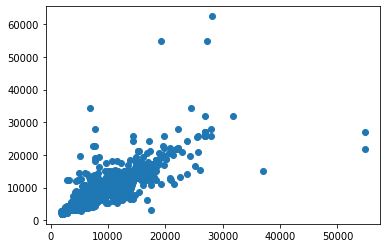

In [145]:
plt.scatter(y_test,dt_pred)

In [159]:
print('MAE ', metrics.mean_absolute_error(y_test,dt_pred))
print('MSE ', metrics.mean_squared_error(y_test,dt_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

MAE  759.6747789911595
MSE  4638162.7060495755
RMSE  2153.6394094763345


### Hyperparameter optimization

In [146]:
params = {"splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]}


In [160]:
dtree_reg = GridSearchCV(dt_reg,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3)

In [161]:
def time(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,tsec = div_mod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(tsec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [162]:
from datetime import datetime
start_time = None
dtree_reg.fit(X_train,y_train)
time(start_time)

Fitting 5 folds for each of 10240 candidates, totalling 51200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 6072 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 10680 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 16312 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 22968 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 30648 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 39352 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 49080 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 51200 out of 51200 | elapsed:  2.8min finished


datetime.datetime(2020, 9, 26, 11, 35, 17, 459479)

In [163]:
dtree_reg.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [164]:
dtree_reg.best_score_

-9934384.977688499

In [165]:
dtree_pred =dtree_reg.predict(X_test)

In [174]:
dtree_reg.score(X_train,y_train),dtree_reg.score(X_test,y_test)

(-10048828.393485753, -9058290.813630393)

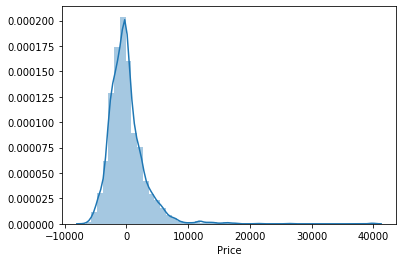

In [166]:
sns.distplot(y_test-dtree_pred)

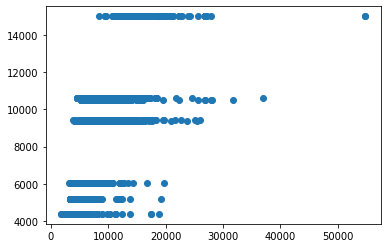

In [167]:
plt.scatter(y_test,dtree_pred)

In [168]:
print('MAE ', metrics.mean_absolute_error(y_test,dtree_pred))
print('MSE ', metrics.mean_squared_error(y_test,dtree_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dtree_pred)))

MAE  2024.8534495266879
MSE  9058290.813630393
RMSE  3009.6994556982586


In [169]:
##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\rk\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [171]:
features = list(X_train.columns)
features

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date',
 'Month',
 'Arrival_Hour',
 'Arrival_Minute',
 'Departure_Hour',
 'Departure_Minute',
 'Duration_Hour',
 'Duration_Minute',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5']

In [172]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

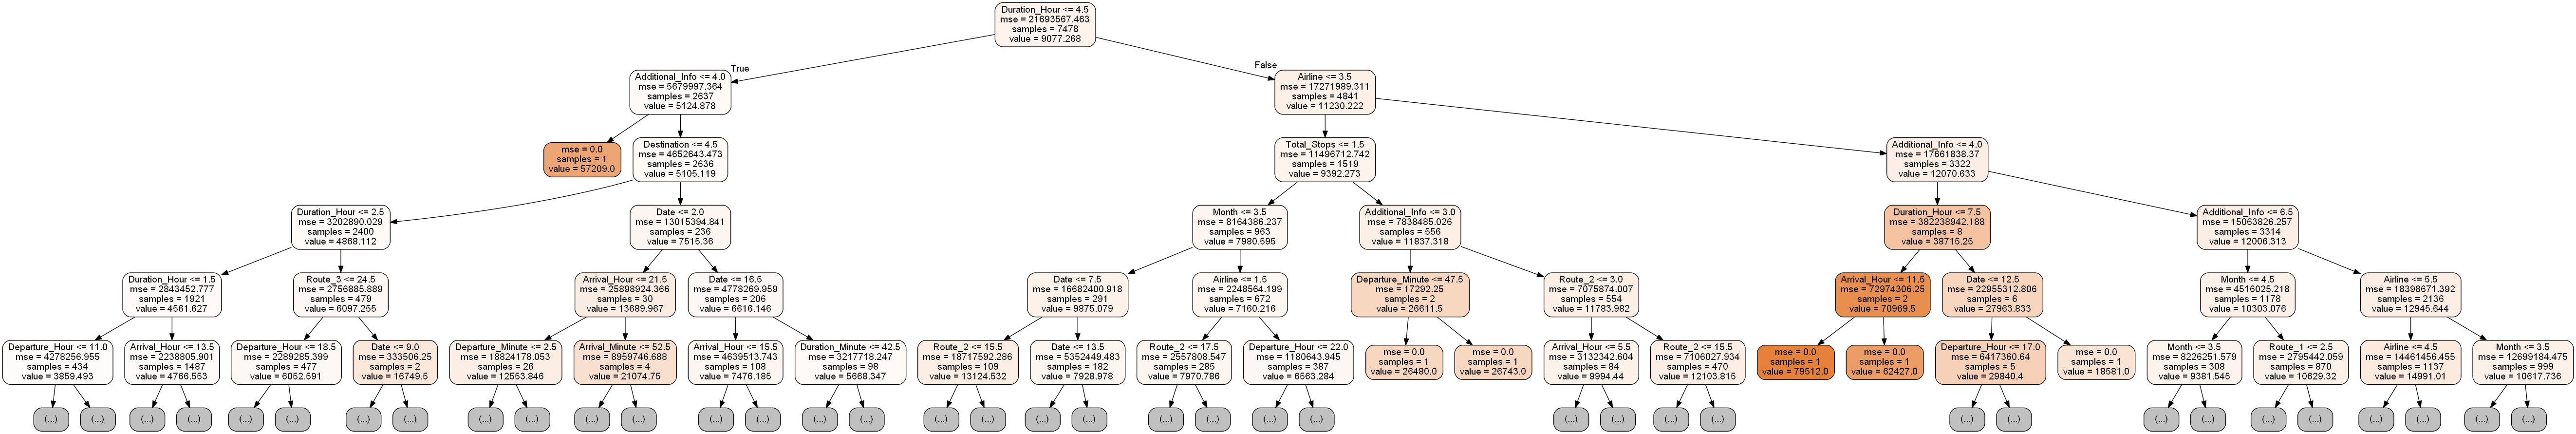

In [175]:
dot_data = StringIO()  
export_graphviz(dt_reg, out_file=dot_data,feature_names=features,filled=True,rounded=True,max_depth=5)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
rf_reg = RandomForestRegressor()

In [178]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [179]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.9797028453774964, 0.8643246120611531)

In [180]:
rf_pred = rf_reg.predict(X_test)

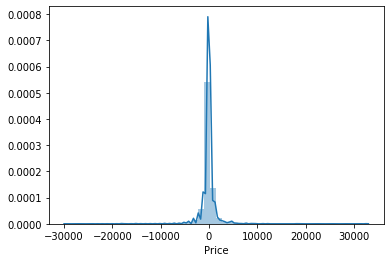

In [181]:
sns.distplot(y_test-rf_pred)

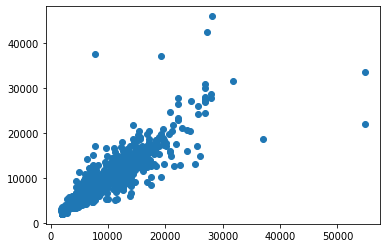

In [182]:
plt.scatter(y_test,rf_pred)

In [183]:
print('MAE ', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE ', metrics.mean_squared_error(y_test,rf_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

MAE  697.6013554626946
MSE  2748301.7857647934
RMSE  1657.8002852469272


### Hyperparameter tuning

In [185]:
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [186]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

max_depth = [int(i) for i in np.linspace(5,30,num=6)]

min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]

max_features = ['auto','sqrt']

min_samples_split = [4,5,7,10,15,100]

min_samples_leaf = [1,5,7,10]

In [196]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [197]:
rand_reg = RandomizedSearchCV(rf_reg,param_distributions=ran_params,n_iter=100,cv=5,scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)

In [198]:
rand_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 22.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [200]:
rand_reg.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [203]:
rand_reg.best_score_

-2742336.4927798025

In [204]:
rand_pred = rand_reg.predict(X_test)

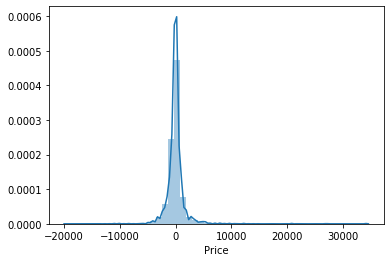

In [207]:
sns.distplot(y_test-rand_pred)

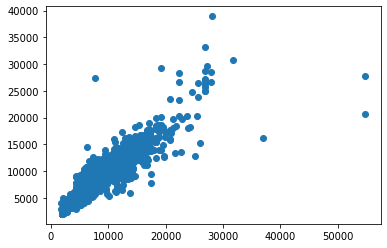

In [209]:
plt.scatter(y_test,rand_pred)

In [205]:
print('MAE ', metrics.mean_absolute_error(y_test,rand_pred))
print('MSE ', metrics.mean_squared_error(y_test,rand_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rand_pred)))

MAE  814.9333953164422
MSE  2579241.6902366467
RMSE  1606.0017715546414


In [212]:
import xgboost as xgb

In [214]:
xg_reg = xgb.XGBRegressor()

In [215]:
xg_reg.fit(X_train,y_train)

[12:27:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [216]:
xg_reg.score(X_train,y_train),xg_reg.score(X_test,y_test)

(0.8483110626872807, 0.7961463124016748)

In [217]:
xg_pred = xg_reg.predict(X_test)

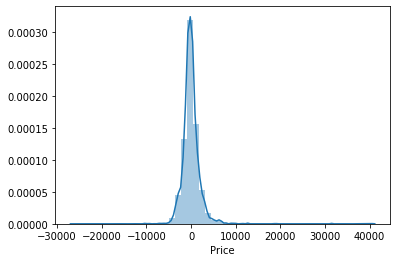

In [219]:
sns.distplot(y_test-xg_pred)

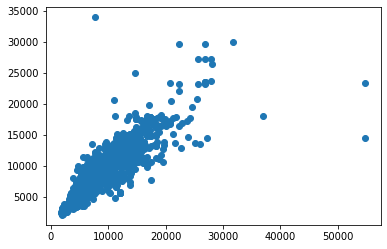

In [220]:
plt.scatter(y_test,xg_pred)

In [222]:
xg_reg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [227]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

learning_rate = [0.2,0.3,0.4,0.5,0.6]

max_depth = [int(i) for i in np.linspace(5,40,num=8)]

min_child_weight = [3,5,6,8,7]

subsample = [0.4,0.5,0.7,0.8,0.9]

In [228]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'learning_rate' : learning_rate,
             'min_child_weight': min_child_weight,
             'subsample':subsample}

In [229]:
xg_r = RandomizedSearchCV(xg_reg,ran_params,n_iter=100,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [230]:
xg_r.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6 
[12:37:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-2924282.523, total=  43.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6 
[12:38:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.5s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-3873532.475, total=  43.5s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6 
[12:39:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-2677107.235, total=  44.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6 
[12:39:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-3486376.209, total=  43.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6 
[12:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-2655483.020, total=  42.9s
[CV] subsample=0.5, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.4 
[12:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3134920.596, total=   5.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.6 
[12:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3798484.506, total=   5.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.6 
[12:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3121919.940, total=   5.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=10, learning_rate=0.3 
[12:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-1812504.501, total=  35.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.2 
[12:51:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2867954.302, total=  38.4s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.2 
[12:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-1936731.361, total=  35.1s
[CV] subsample=0.9, n_estimators=600, min_child_weight=7, max_depth=40, learning_rate=0.4 
[12:53:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

[CV]  subsample=0.7, n_estimators=200, min_child_weight=8, max_depth=40, learning_rate=0.4, score=-2008745.417, total=   6.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=8, max_depth=40, learning_rate=0.4 
[13:01:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=8, max_depth=40, learning_rate=0.4, score=-3048747.040, total=   6.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=8, max_depth=40, learning_rate=0.4 
[13:01:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=8, max_depth=40, learning_rate=0.4, score=-2196112.739, total=   6.2s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=40, learning_rate=0.4 
[13:01:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-1935370.502, total=  37.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.3 
[13:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-3041557.324, total=  38.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.3 
[13:11:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-2334190.612, total=  37.0s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=15, learning_rate=0.5 
[13:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squareder

[CV]  subsample=0.4, n_estimators=1000, min_child_weight=8, max_depth=25, learning_rate=0.2, score=-2017434.638, total=  24.2s
[CV] subsample=0.4, n_estimators=1000, min_child_weight=8, max_depth=25, learning_rate=0.2 
[13:16:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=1000, min_child_weight=8, max_depth=25, learning_rate=0.2, score=-2972499.715, total=  23.1s
[CV] subsample=0.4, n_estimators=1000, min_child_weight=8, max_depth=25, learning_rate=0.2 
[13:16:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=1000, min_child_weight=8, max_depth=25, learning_rate=0.2, score=-2312463.920, total=  23.3s
[CV] subsample=0.4, n_estimators=900, min_child_weight=6, max_depth=30, learning_rate=0.3 
[13:17:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

[CV]  subsample=0.7, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.3, score=-1925418.676, total=   7.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.3 
[13:24:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.3, score=-2825558.885, total=   8.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.3 
[13:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.3, score=-2162250.918, total=   8.5s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=5, learning_rate=0.2 
[13:24:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[C

[CV]  subsample=0.8, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-1815953.351, total=   8.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.2 
[13:28:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2924201.437, total=  10.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.2 
[13:28:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-1936014.017, total=15.7min
[CV] subsample=0.5, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:44:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-2050600.339, total=   4.5s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.5 
[13:52:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-3357702.222, total=   4.9s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.5 
[13:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-2052611.235, total=   5.0s
[CV] subsample=0.4, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.4 
[13:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-1906236.838, total=  11.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=25, learning_rate=0.3 
[14:00:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-3009387.588, total=  12.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=25, learning_rate=0.3 
[14:00:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=25, learning_rate=0.3, score=-2267979.151, total=  11.9s
[CV] subsample=0.5, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.2 
[14:00:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, score=-2722897.347, total=   8.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6 
[14:05:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, score=-3336098.854, total=   9.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6 
[14:06:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, score=-3003076.531, total=   9.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=40, learning_rate=0.4 
[14:06:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.9, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.2, score=-1799778.733, total=  13.8s
[CV] subsample=0.9, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.2 
[14:14:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.2, score=-3152058.952, total=  13.5s
[CV] subsample=0.9, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.2 
[14:14:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.2, score=-2251003.545, total=  13.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=35, learning_rate=0.6 
[14:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-2003966.173, total=   6.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.4 
[14:20:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-3009239.606, total=   6.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.4 
[14:20:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-2921154.671, total=   6.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.3 
[14:20:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[C

[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-2957355.506, total=  39.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=40, learning_rate=0.6 
[14:33:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-3539634.985, total=  38.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=40, learning_rate=0.6 
[14:34:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-2906401.871, total=  43.1s
[CV] subsample=0.8, n_estimators=600, min_child_weight=3, max_depth=10, learning_rate=0.3 
[14:34:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.4, n_estimators=900, min_child_weight=5, max_depth=35, learning_rate=0.2, score=-1797993.184, total=  40.7s
[CV] subsample=0.4, n_estimators=900, min_child_weight=5, max_depth=35, learning_rate=0.2 
[14:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=900, min_child_weight=5, max_depth=35, learning_rate=0.2, score=-2988900.071, total=  41.4s
[CV] subsample=0.4, n_estimators=900, min_child_weight=5, max_depth=35, learning_rate=0.2 
[14:44:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=900, min_child_weight=5, max_depth=35, learning_rate=0.2, score=-2299639.083, total=  41.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=40, learning_rate=0.6 
[14:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-3989379.069, total=  11.0s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.6 
[14:54:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-4473213.261, total=  11.2s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.6 
[14:54:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-4504796.420, total=  10.7s
[CV] subsample=0.9, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.5 
[14:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=25, learning_rate=0.5, score=-2072821.023, total=  37.4s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=25, learning_rate=0.5 
[15:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=25, learning_rate=0.5, score=-3140359.981, total=  36.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=25, learning_rate=0.5 
[15:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=25, learning_rate=0.5, score=-2462410.762, total=  37.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=30, learning_rate=0.5 
[15:03:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.4, score=-2237348.401, total=  45.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.4 
[15:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.4, score=-3517386.013, total=  48.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.4 
[15:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.4, score=-2570085.283, total=  45.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.3 
[15:15:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

[CV]  subsample=0.9, n_estimators=800, min_child_weight=3, max_depth=10, learning_rate=0.3, score=-1993088.398, total=  18.1s
[CV] subsample=0.9, n_estimators=800, min_child_weight=3, max_depth=10, learning_rate=0.3 
[15:22:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=800, min_child_weight=3, max_depth=10, learning_rate=0.3, score=-3109158.072, total=  17.8s
[CV] subsample=0.9, n_estimators=800, min_child_weight=3, max_depth=10, learning_rate=0.3 
[15:22:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, n_estimators=800, min_child_weight=3, max_depth=10, learning_rate=0.3, score=-2857803.943, total=  18.3s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.6 
[15:22:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.5, score=-2333062.635, total=  23.0s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.5 
[15:34:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.5, score=-3311007.790, total=  22.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.5 
[15:35:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.5, score=-2345070.230, total=  23.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=30, learning_rate=0.2 
[15:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 191.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': [0.2, 0.3, 0.4, 0.5,
                                                          0.6],
                                        'max_d

In [232]:
xg_r.score(X_train,y_train),xg_r.score(X_test,y_test)

(-136425.5902276002, -3054056.6903843186)

In [234]:
xg_r.best_params_ , xg_r.best_score_

({'subsample': 0.7,
  'n_estimators': 200,
  'min_child_weight': 8,
  'max_depth': 20,
  'learning_rate': 0.2},
 -2319187.8468018323)

In [235]:
xg_pred = xg_r.predict(X_test)

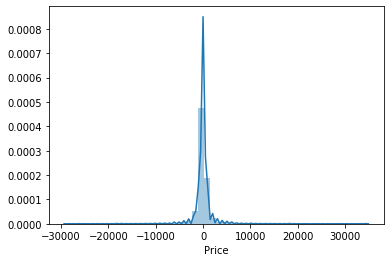

In [237]:
sns.distplot(y_test-xg_pred)

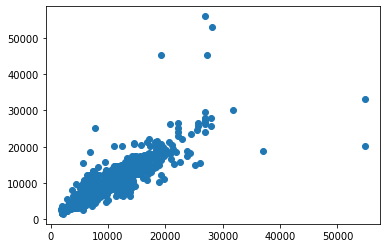

In [238]:
plt.scatter(y_test,xg_pred)

In [239]:
import pickle

In [240]:
#saving model to disk

pickle.dump(rand_reg,open('model.pkl','wb'))

In [ ]:
#Loading model to compare results
model = pickle.load(open('model.pkl','rb'))
print(model.predict)